In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, clear_output, FileLinks

from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier, CatBoostRegressor

import altair as alt
from altair.vega import v5
from IPython.display import HTML
from sklearn import preprocessing
from tqdm.notebook import tqdm
import lightgbm as lgb
import numpy as np
import pandas as pd
import lightgbm as lgb
import glob
import os
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from tqdm.notebook import tqdm
import optuna

import gc, datetime, random

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from collections import defaultdict, Counter

from sklearn.metrics import mean_squared_error
from math import sqrt

import scipy.io as sio
from scipy.io import loadmat, savemat
from scipy.stats.stats import pearsonr 
from scipy.stats import spearmanr

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import time
import warnings
from sklearn.linear_model import *


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.io        
import plotly.graph_objs as go
from PIL import Image



for dirname, _, filenames in os.walk('../input/live-stall-mobile-video-quality-database/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../input/live-stall-mobile-video-quality-database/vim_skate.yuv
../input/live-stall-mobile-video-quality-database/vim_skate_shortInitial.yuv
../input/live-stall-mobile-video-quality-database/vim_skate_3_sms.yuv
../input/live-stall-mobile-video-quality-database/LIVEMobileStallStudy2/LIVEMobileStallStudy2/liveMobileStall_subjectiveData.mat
../input/live-stall-mobile-video-quality-database/LIVEMobileStallStudy2/LIVEMobileStallStudy2/liveMobileStall_videoMetaData.mat


In [2]:
sub_mat = sio.loadmat('../input/live-stall-mobile-video-quality-database/LIVEMobileStallStudy2/LIVEMobileStallStudy2/liveMobileStall_subjectiveData.mat')
sub_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Jan 26 11:40:59 2017',
 '__version__': '1.0',
 '__globals__': [],
 'liveMobileStall_subjectiveData': array([[(array([[array([[47.38581669, 47.38581669, 47.38581669, ..., 72.74619977,
         72.74347853, 72.73803606]])],
        [array([[47.38581669, 47.38581669, 47.38581669, ..., 59.04110331,
         59.05670095, 59.06639543]])],
        [array([[47.17585274, 47.17585274, 47.17585274, ..., 63.46236292,
         63.49908767, 63.52227878]])],
        [array([[47.38581669, 47.38581669, 47.38581669, ..., 42.95673241,
         42.96211069, 42.95820027]])],
        [array([[47.38581669, 47.38581669, 47.38273609, ..., 48.7430191 ,
         48.74948208, 48.75917657]])],
        [array([[47.38581669, 47.38581669, 47.38581669, ..., 61.98721138,
         61.98369324, 61.99255432]])],
        [array([[47.38581669, 47.37747502, 47.36913334, ..., 41.06570629,
         41.08932277, 41.1173698 ]])],
        [array([[47.3858166

In [3]:
# 0 : lools like continous score
# 1 : lools like continous score per sec
# 2 : final score
# 3 : final score
# 4 : each subjects score for each frames
# 5 :  

In [4]:
xx = sub_mat['liveMobileStall_subjectiveData'][0][0][0][1][0]

print(len(xx))
print(xx.shape)
for i in xx:
    print(i)

1
(1, 2213)
[47.38581669 47.38581669 47.38581669 ... 59.04110331 59.05670095
 59.06639543]


174


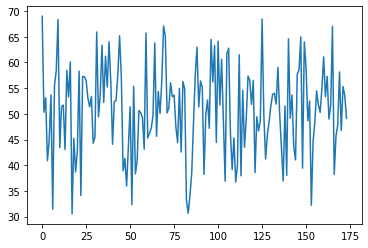

In [5]:
yy = sub_mat['liveMobileStall_subjectiveData'][0][0][2]
print(len(yy))
fig = plt.figure()
plt.plot(yy)
display(fig)

In [6]:
vid_mat = sio.loadmat('../input/live-stall-mobile-video-quality-database/LIVEMobileStallStudy2/LIVEMobileStallStudy2/liveMobileStall_videoMetaData.mat')
# vid_mat

In [7]:
# 0 : name
# 1 : whether video is stlled or not
# 2 : -1 for non stalled secs of stall ??? 20 ???
# 3 : -1 for non stalled where secs of stall ??? 1000 ???
# 4 : stall=100 nostall=0
# 5 : stall in secs
# 6 : len in sec - 1 
# 7 : original
# 8 : from which origonal video
# 9 : 

In [8]:
# vid_mat.keys()
xx = vid_mat['liveMobileStall_videoMetaData'][0][0][4][1][0]

print(len(xx))
print(xx.shape)
for i in xx:
    print(i)

1
(1, 2213)
[0 0 0 ... 0 0 0]


52


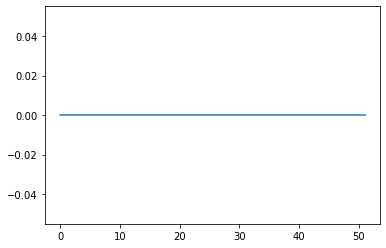

In [9]:
yy = vid_mat['liveMobileStall_videoMetaData'][0][0][5][0][0][0]
print(len(yy))
fig = plt.figure()
plt.plot(yy)
display(fig)

# **Prediction**

# LSTM

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.regularizers import l2


In [11]:
def add_rebuffer(array, is_rebuffered_bool):
    if len(array) == 1:
        array = array[0]
    if len(is_rebuffered_bool) == 1:
        is_rebuffered_bool = is_rebuffered_bool[0]
        
    if len(is_rebuffered_bool) == len(array):
        return np.array(array).reshape(-1, 1)[20:]
    
    new_array = np.array(is_rebuffered_bool)*-1
    j=0
    for i in range(len(new_array)):
        new_array[i] = array[j]
        if is_rebuffered_bool[i]==0:
            j+=1
    return np.array(new_array).reshape(-1, 1)[20:]

In [12]:
using_features = [4, 'frame intreval', 'frame no']

n_input = 4
n_feature = len(using_features)

In [13]:
def model_init(f=0):
    model = Sequential()
    model.add(LSTM(256,activation = 'relu', input_shape= (n_input, n_feature), return_sequences=True, kernel_regularizer=l2(0.01*5), bias_regularizer=l2(0.01*5)))
    model.add(LSTM(128, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01*5), bias_regularizer=l2(0.01*5)))
    model.add(LSTM(64, activation='relu', return_sequences=False, kernel_regularizer=l2(0.01*5), bias_regularizer=l2(0.01*5)))
    model.add(Dense(1, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.compile(optimizer='adam', loss='mse')
    if f:
        print(model.summary())
    return model

In [14]:
# scaled_train

In [15]:

for i in range(len(vid_mat['liveMobileStall_videoMetaData'][0][0][4])):
    
    stack = vid_mat['liveMobileStall_videoMetaData'][0][0][4][i][0].reshape(-1, 1)
    
    intervals = np.array(range(len(stack))) // 200
    
    stack = np.hstack((stack, ))

In [16]:
np.unique(np.array(range(len(stack))) // 200)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [17]:
def get_labels(i):
    cc = np.array(pd.Series(sub_mat['liveMobileStall_subjectiveData'][0][0][4][i][0][0]).replace(np.nan, 0))
    labels = np.array([0.0] * len(cc))
    count = 0
    for j in range(27):
        cc = np.array(pd.Series(sub_mat['liveMobileStall_subjectiveData'][0][0][4][i][j][0]).replace(np.nan, 0))
        if np.sum(cc) == 0:
            continue
        count+=1
        labels += cc
    labels /= count
    return labels.reshape(-1, 1)

get_labels(i)

array([[49.51604879],
       [49.51604879],
       [49.51604879],
       ...,
       [57.66981425],
       [57.67957876],
       [57.67958326]])

In [18]:
train_datas = []
valid_datas = []

train_datas_y = []
valid_datas_y = []

for i in range(len(vid_mat['liveMobileStall_videoMetaData'][0][0][4])):
    
    stack = vid_mat['liveMobileStall_videoMetaData'][0][0][4][i][0].reshape(-1, 1)
    intervals = (np.array(range(len(stack))) // 20).reshape(-1, 1)
    stack = np.hstack((stack, intervals))
    stack = np.hstack((stack, np.array(range(len(stack))).reshape(-1, 1)))

#     labels = sub_mat['liveMobileStall_subjectiveData'][0][0][0][i][0].reshape(-1, 1)
    labels = get_labels(i)

    
#     # not a good normalisib but still
#     for j in range(stack.shape[1]):
#         if stack[:, j].std() != 0:
#             stack[:, j]  = (stack[:, j] -  stack[:, j].mean()) /  stack[:, j].std()

    if labels.std() != 0:
        labels  = 100*(labels -  labels.mean()) /  labels.std()
    
    
    
    stack = stack[20:, :]
    labels = labels[20:]
    
    stack = stack[1:, :]
    labels = labels[:-1]

    n_feature = stack.shape[1]
    train, valid = stack[: int(0.80*len(stack)), :],  stack[int(0.80*len(stack)) - n_input:, :]
    scaled_train, scaled_valid = labels[: int(0.80*len(stack))],  labels[int(0.80*len(stack)) - n_input:]

    train_generator = TimeseriesGenerator(train,scaled_train,length=n_input, batch_size=1)
    valid_generator = TimeseriesGenerator(valid,scaled_valid,length=n_input, batch_size=1)    
    train_datas.append(train)
    valid_datas.append(valid)
    
    train_datas_y.append(scaled_train)
    valid_datas_y.append(scaled_valid)
    
    if i==2:
        break

In [19]:
# model = model_init(1)

In [20]:
# model.fit_generator(train_generator,epochs=50, validation_data=valid_generator)

In [21]:
# tr_loss= model.history.history['loss']
# val_loss= model.history.history['val_loss']

# fig = plt.figure(figsize=(20,10));display(fig)
# plt.plot(tr_loss, 'b')
# plt.plot(val_loss, 'r')

# display(fig)

In [22]:
# atcual_train = scaled_train[:]
# plt_x_train = range(len(atcual_train))
# pred_train = model.predict(train_generator)
# plt_x_train_p = n_input+np.array(range(len(pred_train)))


# atcual_valid = scaled_valid[:]
# pred_valid = model.predict(valid_generator)
# plt_x_valid = np.array(range(len(atcual_train), len(atcual_train)+len(atcual_valid)))-n_input
# plt_x_valid_p = n_input+np.array(range(len(atcual_train), len(atcual_train)+len(pred_valid)))-n_input


# fig2 = plt.figure(figsize=(20,10));
# plt.plot(plt_x_valid, atcual_valid, 'g')
# plt.plot(plt_x_train_p, pred_train, 'b')
# plt.plot(plt_x_train, atcual_train, 'g')
# plt.plot(plt_x_valid_p, pred_valid, 'r')


# display(fig2)

# DataFrame based ML

In [23]:
def get_df(train_generator):
    count=0
    for i in train_generator:
        count+=1
    df = pd.DataFrame(index=range(count))

    feats = []
    labels = []
    for seq in tqdm(train_generator):
        feat_1 = []
        for row in seq[0][0]:
            for elem in row:
                feat_1.append(elem)

        feats.append(feat_1)
        labels.append(seq[1][0][0])

    df = pd.DataFrame(feats)
    df['labels'] = labels
    return df

In [24]:
train, valid = get_df(train_generator), get_df(valid_generator)
X_train, y_train = train.drop('labels', axis=1), train['labels']
X_validation, y_validation = valid.drop('labels', axis=1), valid['labels']


data_generator = TimeseriesGenerator(stack,labels,length=n_input, batch_size=1)
data = get_df(data_generator)
X_train, X_validation, y_train, y_validation = train_test_split(data.drop('labels', axis=1), data['labels'], train_size=0.800)
X_train = X_train.sort_index()
X_validation = X_validation.sort_index()


y_train = y_train.sort_index()
y_validation = y_validation.sort_index()


  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/254 [00:00<?, ?it/s]

  0%|          | 0/1264 [00:00<?, ?it/s]

In [25]:
cat_cols = []
cat_cols = X_train.columns

In [26]:
range_cols = []
for i in range(len(X_train.columns)//3):
    range_cols.append(3*i+2)
    
interval_cols = []
for i in range(len(X_train.columns)//3):
    interval_cols.append(3*i+1)
    
cat_cols = []
for i in range(len(X_train.columns)//3):
    cat_cols.append(3*i)
cat_cols


[0, 3, 6, 9]

In [27]:
params = {'learning_rate': 0.01024129583699132,
 'l2_leaf_reg': 0.00019980149774000808,
 'max_depth': 4,
 'iterations': 1854,
 'bagging_temperature': 0.01914241266114443,
 'max_ctr_complexity': 2,
 'max_bin': 35}

In [28]:
# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):
    param = {
        "eval_metric": "RMSE",
        'logging_level': 'Silent',
        'boosting_type' : 'Plain' ,
        "learning_rate": trial.suggest_float("learning_rate", 1e-2, 0.5, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 500.0, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 12, log=False),
#         'task_type':"GPU",       
        "iterations": trial.suggest_int("iterations", 50, 5000),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 1e-2, 0.5, log=True),
        "max_ctr_complexity": trial.suggest_int("max_ctr_complexity", 2, 2),
        "max_bin": trial.suggest_int("max_bin", 32, 200),
        "use_best_model" : False,
    }
    
    
    model = CatBoostRegressor(**param)
    model = model.fit(
                        X_train, y_train, 
                        cat_features=cat_cols,
                        use_best_model=False,
#                         eval_set=(X_validation, y_validation),
                     )
    preds = model.predict(X_validation)
    accuracy = sklearn.metrics.mean_squared_error(y_validation, preds, squared=False)
    return accuracy

In [29]:
study = optuna.create_study(direction="minimize")
# study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5)
print("Number of finished trials: {}".format(len(study.trials)))
trial = study.best_trial
print("Best trial:")
# paramss.append(trial.params)
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
params = trial.params
trial.params

[I 2021-03-04 09:25:10,858] A new study created in memory with name: no-name-d18b383c-0f96-4586-bf40-d92c17194af3
[I 2021-03-04 09:25:14,590] Trial 0 finished with value: 5.776895941970442 and parameters: {'learning_rate': 0.029567816372026663, 'l2_leaf_reg': 0.010182681199112215, 'max_depth': 7, 'iterations': 1575, 'bagging_temperature': 0.0199368554476607, 'max_ctr_complexity': 2, 'max_bin': 120}. Best is trial 0 with value: 5.776895941970442.
[I 2021-03-04 09:25:16,077] Trial 1 finished with value: 5.426374689439236 and parameters: {'learning_rate': 0.1330456709756572, 'l2_leaf_reg': 0.002333620181529764, 'max_depth': 6, 'iterations': 667, 'bagging_temperature': 0.03090051479609823, 'max_ctr_complexity': 2, 'max_bin': 196}. Best is trial 1 with value: 5.426374689439236.
[I 2021-03-04 09:25:45,656] Trial 2 finished with value: 5.884705451010305 and parameters: {'learning_rate': 0.4624994171184891, 'l2_leaf_reg': 0.06969590769003361, 'max_depth': 10, 'iterations': 3125, 'bagging_tempe

Number of finished trials: 5
Best trial:
  Value: 5.426374689439236
  Params: 
    learning_rate: 0.1330456709756572
    l2_leaf_reg: 0.002333620181529764
    max_depth: 6
    iterations: 667
    bagging_temperature: 0.03090051479609823
    max_ctr_complexity: 2
    max_bin: 196


{'learning_rate': 0.1330456709756572,
 'l2_leaf_reg': 0.002333620181529764,
 'max_depth': 6,
 'iterations': 667,
 'bagging_temperature': 0.03090051479609823,
 'max_ctr_complexity': 2,
 'max_bin': 196}

In [30]:
params['eval_metric'] = 'RMSE'
params['logging_level'] = 'Silent'
params['boosting_type'] = 'Plain'

In [31]:
# model_range = CatBoostRegressor(**params)
# model_range.fit(
#         X_train, y_train, 
#         cat_features=cat_cols,
#         use_best_model=False,
# #         eval_set=(X_validation, y_validation),
#      )
# model_range.get_params()

In [32]:
model = CatBoostRegressor(**params)
model.fit(
        X_train, y_train, 
        cat_features=cat_cols,
        use_best_model=False,
#         eval_set=(X_validation, y_validation),
     )
model.get_params()

{'iterations': 667,
 'learning_rate': 0.1330456709756572,
 'l2_leaf_reg': 0.002333620181529764,
 'loss_function': 'RMSE',
 'logging_level': 'Silent',
 'max_ctr_complexity': 2,
 'eval_metric': 'RMSE',
 'bagging_temperature': 0.03090051479609823,
 'boosting_type': 'Plain',
 'max_depth': 6,
 'max_bin': 196}

In [33]:
# model = LinearRegression()
# model.fit(
#         X_train, y_train, 
# #         cat_features=cat_cols,
# #         use_best_model=False,
# #         eval_set=(X_validation, y_validation),
#      )
# model.get_params()

In [34]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
2,100,1,23,100,1,24,100,1,25,100,1,26
3,100,1,24,100,1,25,100,1,26,100,1,27
4,100,1,25,100,1,26,100,1,27,100,1,28
5,100,1,26,100,1,27,100,1,28,100,1,29
6,100,1,27,100,1,28,100,1,29,0,1,30


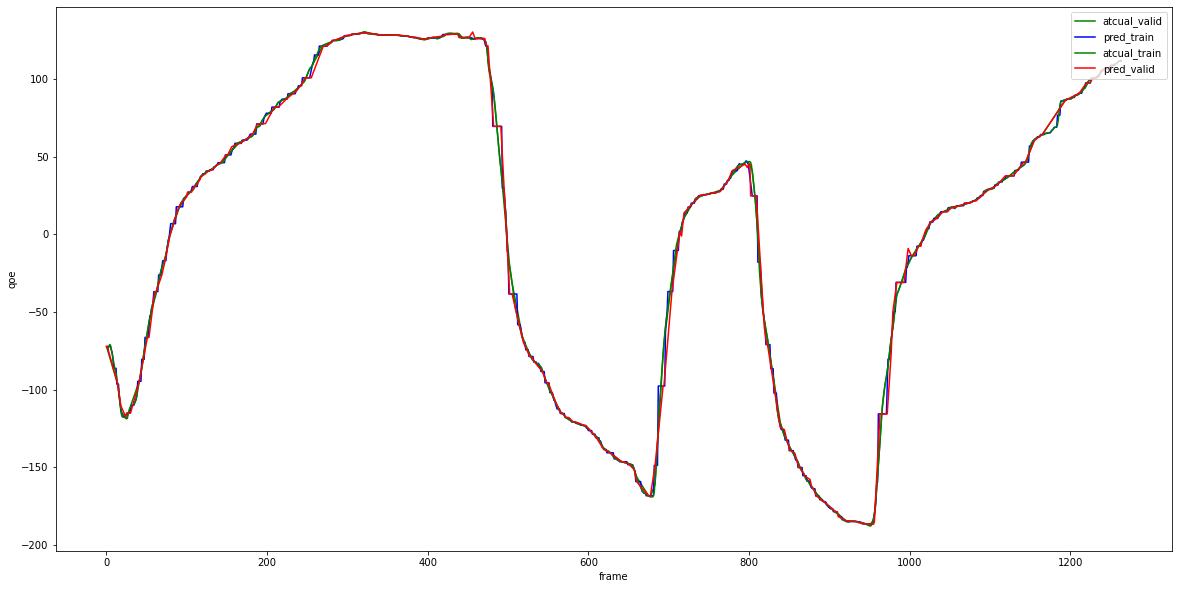

In [35]:
atcual_train = y_train[:]
pred_train = model.predict(X_train)


atcual_valid = y_validation[:]
pred_valid = model.predict(X_validation)

plt_x_train = range(len(atcual_train))
plt_x_train_p = n_input+np.array(range(len(pred_train)))
plt_x_valid = np.array(range(len(atcual_train), len(atcual_train)+len(atcual_valid)))-n_input
plt_x_valid_p = n_input+np.array(range(len(atcual_train), len(atcual_train)+len(pred_valid)))-n_input


plt_x_train = np.array(X_train.index)
plt_x_train_p = np.array(X_train.index)
plt_x_valid = np.array(X_validation.index)
plt_x_valid_p = np.array(X_validation.index)


fig2 = plt.figure(figsize=(20,10));
plt.plot(plt_x_valid, atcual_valid, 'g')
plt.plot(plt_x_train_p, pred_train, 'b')
plt.plot(plt_x_train, atcual_train, 'g')
plt.plot(plt_x_valid_p, pred_valid, 'r')
plt.xlabel('frame')
plt.ylabel('qoe')
plt.legend(["atcual_valid", "pred_train", "atcual_train", "pred_valid"], loc ="upper right") 


display(fig2)

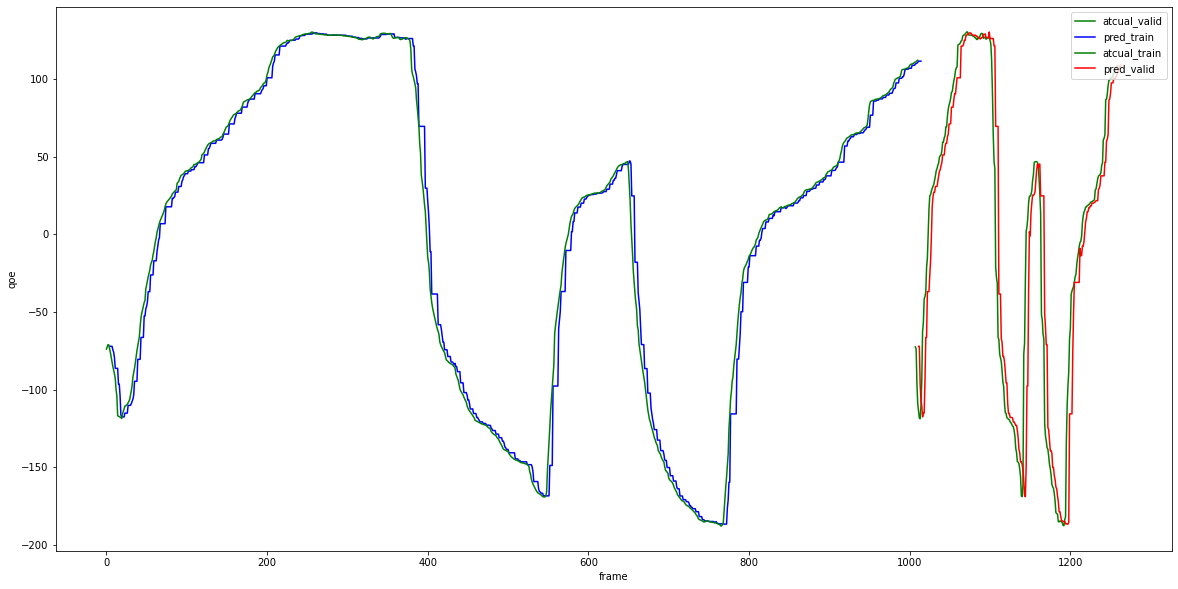

In [36]:
atcual_train = y_train[:]
pred_train = model.predict(X_train)


atcual_valid = y_validation[:]
pred_valid = model.predict(X_validation)

plt_x_train = range(len(atcual_train))
plt_x_train_p = n_input+np.array(range(len(pred_train)))
plt_x_valid = np.array(range(len(atcual_train), len(atcual_train)+len(atcual_valid)))-n_input
plt_x_valid_p = n_input+np.array(range(len(atcual_train), len(atcual_train)+len(pred_valid)))-n_input


# plt_x_train = np.array(X_train.index)
# plt_x_train_p = np.array(X_train.index)
# plt_x_valid = np.array(X_validation.index)
# plt_x_valid_p = np.array(X_validation.index)


fig2 = plt.figure(figsize=(20,10));
plt.plot(plt_x_valid, atcual_valid, 'g')
plt.plot(plt_x_train_p, pred_train, 'b')
plt.plot(plt_x_train, atcual_train, 'g')
plt.plot(plt_x_valid_p, pred_valid, 'r')
plt.xlabel('frame')
plt.ylabel('qoe')
plt.legend(["atcual_valid", "pred_train", "atcual_train", "pred_valid"], loc ="upper right") 


display(fig2)

# Metrics

Lables have benn normalised to have mean = 0 ,and std=100

RMSE

In [37]:
sklearn.metrics.mean_absolute_error(atcual_valid, pred_valid)

2.533882028521946

In [38]:
sklearn.metrics.mean_squared_error(atcual_valid, pred_valid, squared=False)

5.426374689439236